In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Plan" data-toc-modified-id="Plan-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Plan</a></div><div class="lev2 toc-item"><a href="#Classes" data-toc-modified-id="Classes-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Classes</a></div><div class="lev2 toc-item"><a href="#Tests" data-toc-modified-id="Tests-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Tests</a></div>

## Plan
* Code in idle for prototyping
* Move to functions.py for functions
* Move finished tests to tests.py

## Classes
The following classes/methods exist in the dataset
* downsample
* encode
* Network
* Loss

In [2]:
from functions import *
from tests import *

## Tests
Writing tests for all of these methods. Checking all of them should be sufficient for this code.

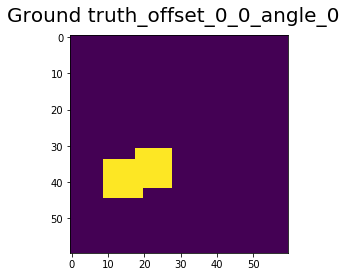

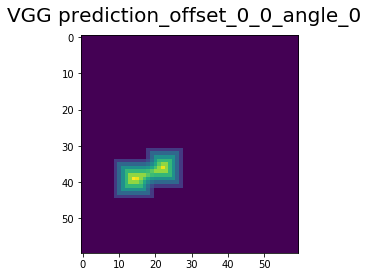

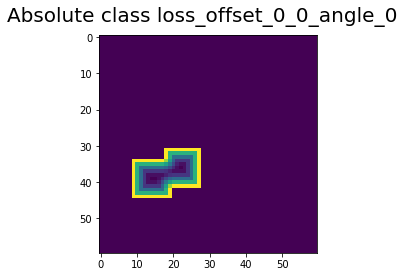

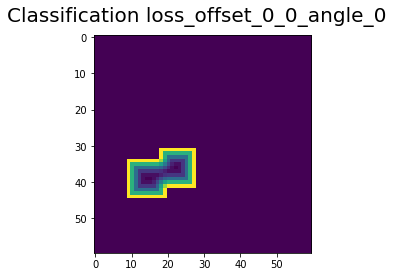

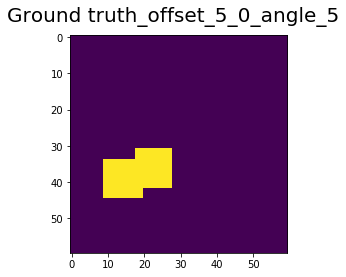

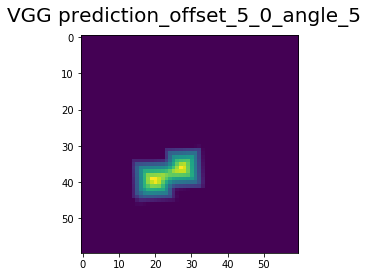

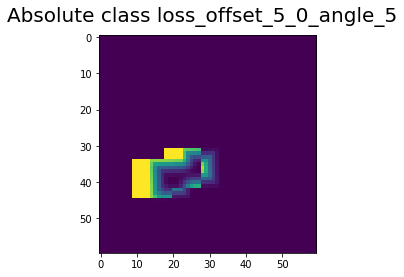

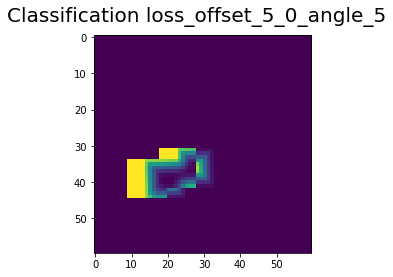

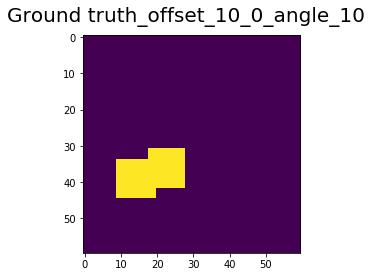

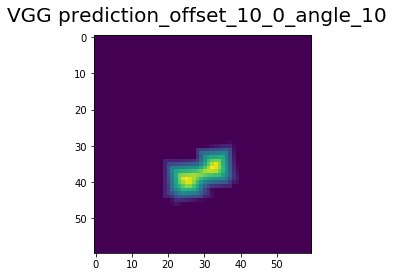

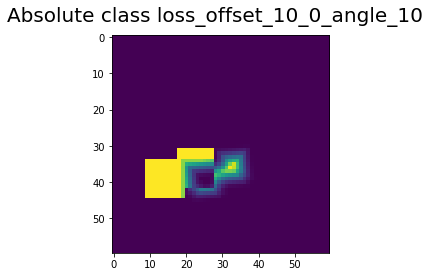

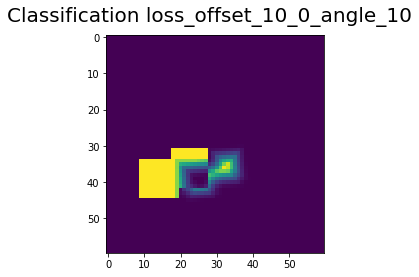

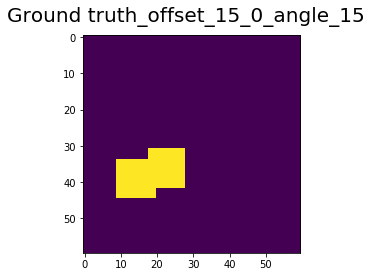

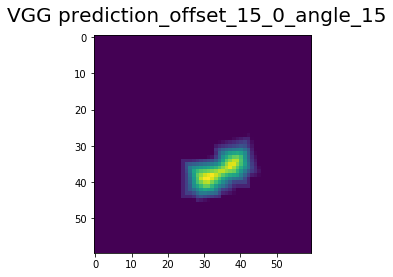

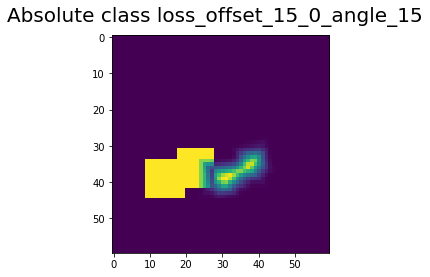

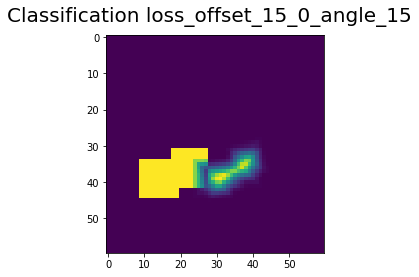

.

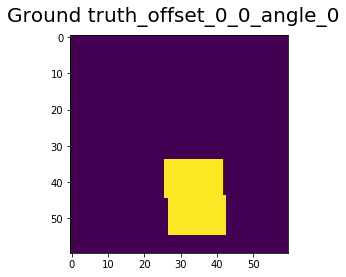

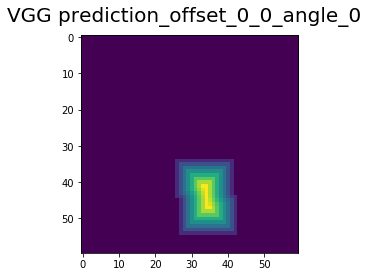

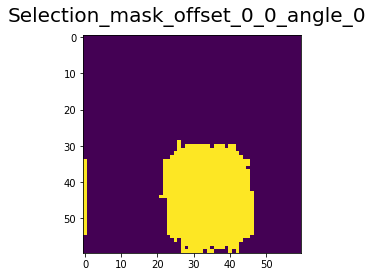

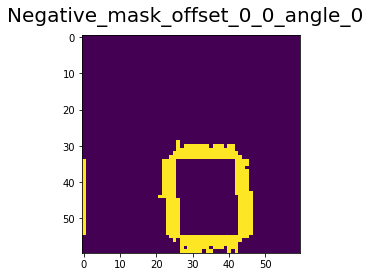

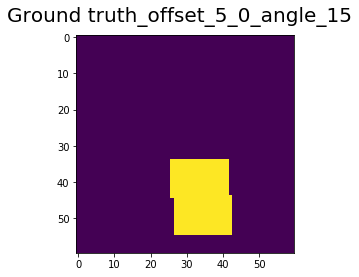

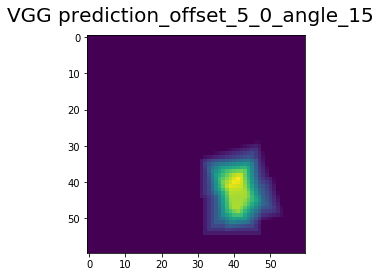

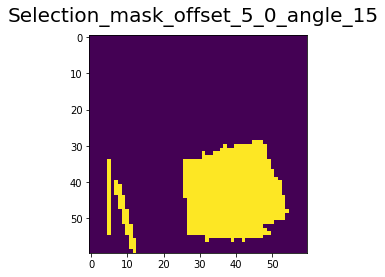

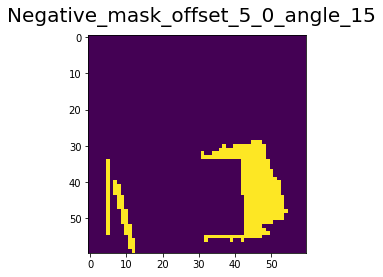

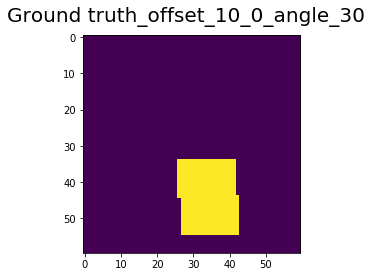

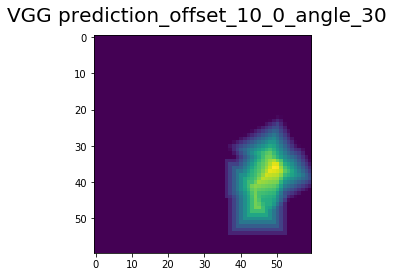

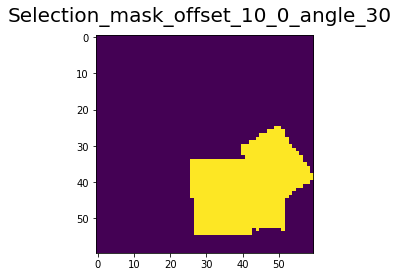

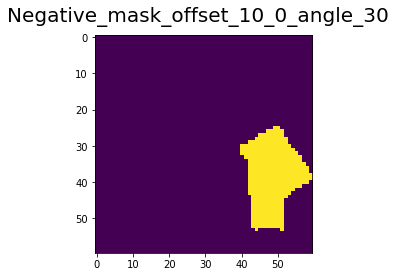

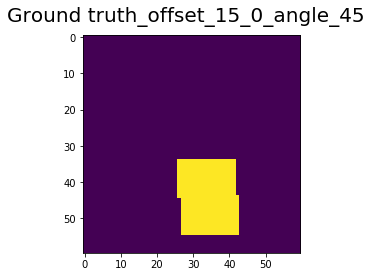

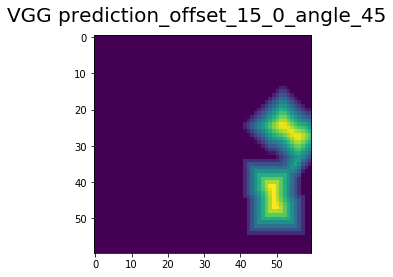

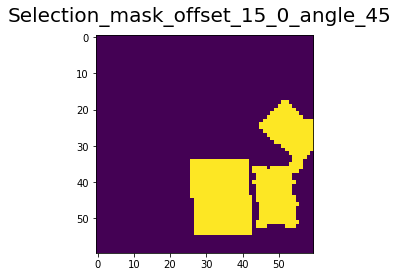

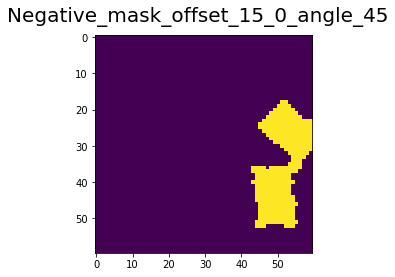

.

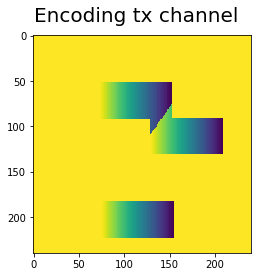

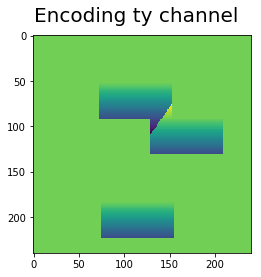

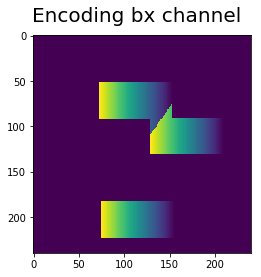

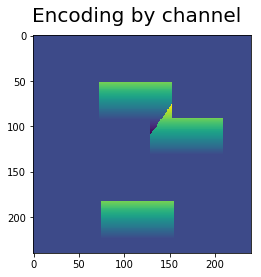

.

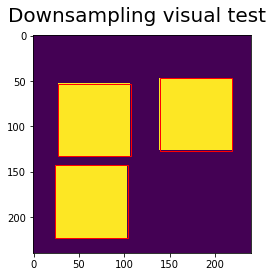

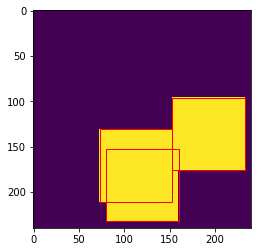

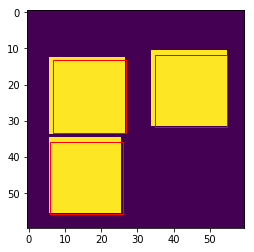

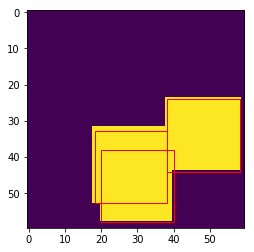

.
----------------------------------------------------------------------
Ran 4 tests in 4.416s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [3]:
ts = TestSuite()
#ts.ad
ts.addTests([TestCode('test_class_loss')]) 
ts.addTests([TestCode('test_select_mask')])
ts.addTests([TestCode('test_encode_y')])
ts.addTests([TestCode('test_downsample')])

#ts.addTests([TestCode('test_network')])
#ts.addTests([TestCode('test_reg_loss')])

unittest.TextTestRunner().run(ts)

In [12]:
!git status

On branch pawan_files
Your branch is up-to-date with 'origin/pawan_files'.
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/

nothing added to commit but untracked files present (use "git add" to track)


In [16]:
import chainer.functions as F
ob1 = np.random.random((2,1,4,4)).astype(np.float32)
ob2 = np.random.random((2,1,4,4)).astype(np.float32)
F.huber_loss(ob1,ob2, 0.5)

(2, 4, 4)